TFM
ESTUDIO DE LOS DATOS

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/UOC/TFM/KETI/

KeyboardInterrupt: ignored

In [ ]:
from pandas.core.api import DataFrame
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
pd.set_option("display.precision", 10)
import os
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
from pylab import *
import pickle
import seaborn as sns
import sys


## FUNCTIONS, UTILITIES AND MORE

In [ ]:
## CONSTANT, PARAMETERS & CONVERT UTILITIES

LIM_MIN = 1377320400
LIM_MAX = 1377925200

## ROOMS
top = '/content/drive/MyDrive/UOC/TFM/KETI'
rooms = []
for root, dirs, files in os.walk(top, topdown=True):
   #print (root)
   #for name in files:
   #   print(os.path.join(root, name))
   for name in dirs:
      rooms.append(name)
rooms.sort(reverse=False)

# DICS TO CONVERT ROOM NUMBER TO SECUENCTIAL AND VICEVERSA
sec = range(0,51)
dic_SecRoom = dict(zip(sec,rooms))
dic_RoomSec = dict(zip(rooms,sec))

# DICS TO CONVERT CATEGORIES TO NUMBER AND VICEVERSA
cats= ['co2', 'Humidity', 'Light', 'Pir', 'Temperature'] 
sec2= range(1,6)

dic_SecCat = dict(zip(sec2,cats))
dic_CatSec = dict(zip(cats,sec2))

# TOTAL RANGE BETWEEN LIMS
totalRange = []

for tR in range(LIM_MIN, LIM_MAX, 5):
 totalRange.append(tR)

cats= ['co2', 'Humidity', 'Light', 'Pir', 'Temperature'] 
feat = ['size','min','max']
ScCats = ["ScCo2", "ScHum","ScLight", "ScPir", "ScTem"]

n_steps = 25
n_features = 1

In [ ]:
# FUNCTION TO GENERATE A RANGE FROM A TIME
def timeRange(time):
  m=0
  if time%5 == 0:
    ra = time
  else:
    for h in range(1,5):
      preRa = time - h
      if preRa%5 == 0:
        ra = preRa
        break
  return ra

# FUNCTION TO PLOT ALL ROOMS FROM A CATEGORY
def print_cat(catStr): 
  nrows = 10
  ncols=5 
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,20), constrained_layout=True)
  t = 0
  i = 0
  r = 0
  cat = dic_CatSec [catStr]
  for i in range(0, nrows):
    for t in range(0,ncols):

      ax[i,t].plot(KETI[r][cat][1].iloc[:, 0])
      ax[i,t].title.set_text('Hab. ' + str(r))
      r = r+1

  plt.show()

# FUNCTION TO PLOT A ROOM AND A CATEGORY
def plot_1_room(r, catStr):
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,4), constrained_layout=True)
  cat = dic_CatSec [catStr]
  ax.plot(KETI[r][cat][1].iloc[:, 0])
  ax.title.set_text('Hab. ' + dic_SecRoom[r])
  
  plt.show()

# FUNCTION TO CONVERT UNIX TIME TO TIMESTAMP
def unix2time(ut):
  return datetime.datetime.fromtimestamp(ut).strftime('%Y-%m-%d %H:%M:%S')

def rangUnix2time(ut1, ut2):
  return unix2time(ut1), unix2time(ut2)

# FUNCTION TO CONVERT A LIST OF UNIX TIMES
def unix2time_ls(uts):
  ut_ls = []
  for ut in uts:
    ut_ls.append(datetime.datetime.fromtimestamp(ut).strftime('%Y-%m-%d %H:%M:%S'))  
  return ut_ls

# FUNCTION TO SHOW A HEATMAP FROM A CORRELATION MATRIX
def heat_Map (corr):
  fig, ax = plt.subplots(figsize=(5, 5))
  colormap =sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
  sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
  plt.xticks(range(len(corr.columns)), corr.columns);
  plt.yticks(range(len(corr.columns)), corr.columns)
  plt.show()

## DATA LOAD. 
def KETI_load():
  now1 = time.time()
  KETI = []
  cNames=["time", "data"]
  p=1
  for room in tqdm(rooms):
  
    f = top+"/"+ room + "/"
    roomFiles = []
    dfco2 = pd.read_csv(f+"co2.csv", header=None, names=['time','co2'], index_col="time")
    if dfco2.isnull().sum().sum() > 0: print(room)
    dfco2['timeRange'] = [timeRange(i)  for i in dfco2.index.values]

    dfhum = pd.read_csv(f+"humidity.csv", header=None, names=['time','Humidity'], index_col="time")
    if dfhum.isnull().sum().sum() > 0: print(room)
    dfhum['timeRange'] = [timeRange(i)  for i in dfhum.index.values]

    dflig = pd.read_csv(f+"light.csv", header=None, names=['time','Light'], index_col="time")
    if dflig.isnull().sum().sum() > 0: print(room)
    dflig['timeRange'] = [timeRange(i)  for i in dflig.index.values]

    dfpir = pd.read_csv(f+"pir.csv", header=None, names=['time','Pir'], index_col="time")
    if dfpir.isnull().sum().sum() > 0: print(room)
    dfpir['timeRange'] = [timeRange(i)  for i in dfpir.index.values]

    dftem = pd.read_csv(f+"temperature.csv", header=None, names=['time','Temperature'], index_col="time")
    if dftem.isnull().sum().sum() > 0: print(room)
    dftem['timeRange'] = [timeRange(i)  for i in dftem.index.values]

    roomFiles= [room,["co2", dfco2],["Humidity", dfhum],["Light", dflig],["Pir", dfpir],["Temperature", dftem]]
    KETI.append(roomFiles)
  now2 = time.time()
  print ('tiempo de proceso: ', round(now2-now1,2) , 'segundos')
  return KETI

## LOAD DATA

In [ ]:
KETI = KETI_load()

100%|██████████| 51/51 [02:49<00:00,  3.33s/it]

tiempo de proceso:  169.86 segundos


In [ ]:
# Examples
print (KETI[0][0])                 ## --> ROOM
print (KETI[0][2][0])              ## --> CATHEGORY: 'co2', 'hum', 'lig', 'pir', 'tem'
print (KETI[0][2][1])              ## --> DATAFRAME  FOR A HABITACION/CAT
print (KETI[0][2][1].iloc[:, 0])   ## --> GET TO COLUMN 0 'CAT DATA'


413
Humidity
            Humidity   timeRange
time                            
1377299107     45.34  1377299105
1377299108     45.34  1377299105
1377299126     45.34  1377299125
1377299131     45.31  1377299130
1377299136     45.34  1377299135
...              ...         ...
1377973384     51.41  1377973380
1377973389     51.41  1377973385
1377973394     51.41  1377973390
1377973399     51.41  1377973395
1377973409     51.41  1377973405

[130860 rows x 2 columns]
time
1377299107    45.34
1377299108    45.34
1377299126    45.34
1377299131    45.31
1377299136    45.34
              ...  
1377973384    51.41
1377973389    51.41
1377973394    51.41
1377973399    51.41
1377973409    51.41
Name: Humidity, Length: 130860, dtype: float64


In [ ]:
# PIR Example 
KETI[0][4][1]['Pir'].loc[1377349107:1377349257]

time
1377349107    30.0
1377349117    29.0
1377349127    28.0
1377349137    27.0
1377349147    26.0
1377349157    25.0
1377349167    24.0
1377349177    23.0
1377349187    22.0
1377349197    21.0
1377349207    20.0
1377349217    19.0
1377349227    18.0
1377349237    17.0
1377349247    16.0
1377349257    15.0
Name: Pir, dtype: float64

## TIME STUDY   

In [ ]:
# I build a Pandas with size by room and max and min value of time. 
sizes= []
preSizes=[]

for room in range (0,len(rooms)):
  for cat in range (1,6):
      preSizes= [
                 KETI[room][0],
                 dic_RoomSec[KETI[room][0]] ,
                 KETI[room][cat][0], 
                 len(KETI[room][cat][1]), 
                 KETI[room][cat][1].index.values.min(), 
                 KETI[room][cat][1].index.values.max()
                 ]
      sizes.append(preSizes)
df_sizes = pd.DataFrame(sizes, columns=["room", "roomSec","cat","size","min","max"])
print (df_sizes.shape)

df_sizes.head()

(255, 6)


,room,roomSec,cat,size,min,max
0,413,0,co2,130912,1377299107,1377973409
1,413,0,Humidity,130860,1377299107,1377973409
2,413,0,Light,130860,1377299107,1377973409
3,413,0,Pir,72186,1377299108,1378018734
4,413,0,Temperature,130860,1377299107,1377973409


In [ ]:
print('Valor mínimo de la variable temporal es: '+ str(df_sizes['min'].min())+ ', '+ unix2time(df_sizes['min'].min()))
print('Valor máximo de la variable temporal es: '+ str(df_sizes['max'].max())+ ', '+ unix2time(df_sizes['max'].max()))

Valor mínimo de la variable temporal es: 1377270000, 2013-08-23 15:00:00
Valor máximo de la variable temporal es: 1378018739, 2013-09-01 06:58:59


In [ ]:
df_sizes.to_csv('/content/drive/My Drive/UOC/TFM/GITHUB/sizesMinMax.csv', sep=',')

In [ ]:
df_sizes_co2 = df_sizes[df_sizes['cat']=='co2']
df_sizes_hum = df_sizes[df_sizes['cat']=='Humidity']
df_sizes_lig = df_sizes[df_sizes['cat']=='Light']
df_sizes_pir = df_sizes[df_sizes['cat']=='Pir']
df_sizes_tem = df_sizes[df_sizes['cat']=='Temperature']


## HISTOGRAM WITH NUMBER OF ROWS, MAX AND MIN FOR TIME BY CATHEGORY (VARIABLE)

In [ ]:
def print_his(): 
  df_sizes_co2 = df_sizes[df_sizes['cat']=='co2']
  df_sizes_hum = df_sizes[df_sizes['cat']=='Humidity']
  df_sizes_lig = df_sizes[df_sizes['cat']=='Light']
  df_sizes_pir = df_sizes[df_sizes['cat']=='Pir']
  df_sizes_tem = df_sizes[df_sizes['cat']=='Temperature']

  nrows = 3
  ncols=5 
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,9), constrained_layout=True)
  
  t = 0 
  for cat in cats:
    i=0
    for f in feat:
      ax[i,t].hist(df_sizes[df_sizes['cat']== cat][f])
      ax[i,t].title.set_text('Hist. '+' '+ cat + ' '+ f)
      i=i+1
    t=t+1

  plt.show()

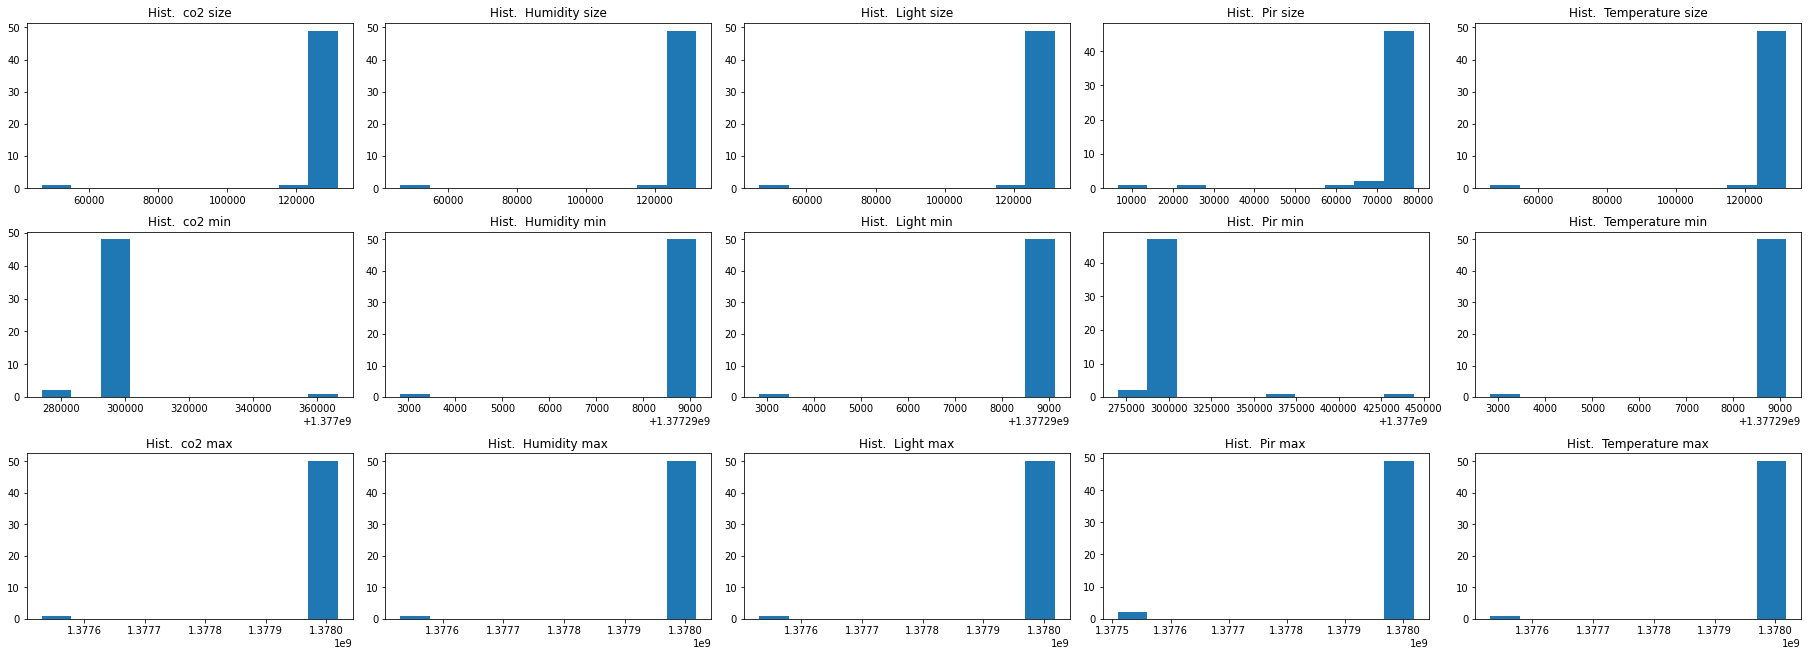

In [ ]:
print_his()

## BASIC STATISTICS

In [ ]:
se_mean = df_sizes.groupby("cat").mean()
se_med = df_sizes.groupby("cat").median()
se_std =  df_sizes.groupby("cat").std()
se_sem =  df_sizes.groupby("cat").sem() 

frame = {
         'mean_size': round(se_mean['size'],2), 
         #'median_size': se_med['size'],
         #'std_size': se_std['size'],
         'sem_size': round(se_sem['size'],2), 
         'mean_máximo': se_mean['max'], 
         #'median_máximo': se_med['max'],
         #'std_máximo': se_std['max'],
         'sem_máximo(hrs)': round(se_sem['max']/60/60,2),
         'mean_mínimo': se_mean['min'], 
         #'median_mínimo': se_med['min'],
         #'std_mínimo': se_std['min'],
         'sem_mínimo(hrs)': round(se_sem['min']/60/60,2),
         }
df_resultCat = pd.DataFrame(frame,index=cats)

df_resultCat['mean_máximo'] = df_resultCat['mean_máximo'].apply(unix2time)
df_resultCat['mean_mínimo'] = df_resultCat['mean_mínimo'].apply(unix2time)

df_resultCat[['mean_size','sem_size', 'mean_máximo', 'sem_máximo(hrs)', 'mean_mínimo', 'sem_mínimo(hrs)' ]]

,mean_size,sem_size,mean_máximo,sem_máximo(hrs),mean_mínimo,sem_mínimo(hrs)
co2,128902.12,1669.94,2013-08-31 18:19:02,2.53,2013-08-23 23:11:03,0.42
Humidity,128852.25,1675.26,2013-08-31 18:03:10,2.51,2013-08-23 23:03:01,0.03
Light,128852.22,1675.26,2013-08-31 18:03:10,2.51,2013-08-23 23:03:01,0.03
Pir,70469.67,1659.63,2013-09-01 01:32:38,3.81,2013-08-23 23:57:38,0.88
Temperature,128853.04,1675.28,2013-08-31 17:52:17,2.50,2013-08-23 23:03:01,0.03


At this point we can select time limits for the study. They are LIM_MIN = 1377320400 and LIM_MAX = 1377925200Showing. Now we show how selected limits affect to room data. It is shown a grey line with limit values for better visualization 

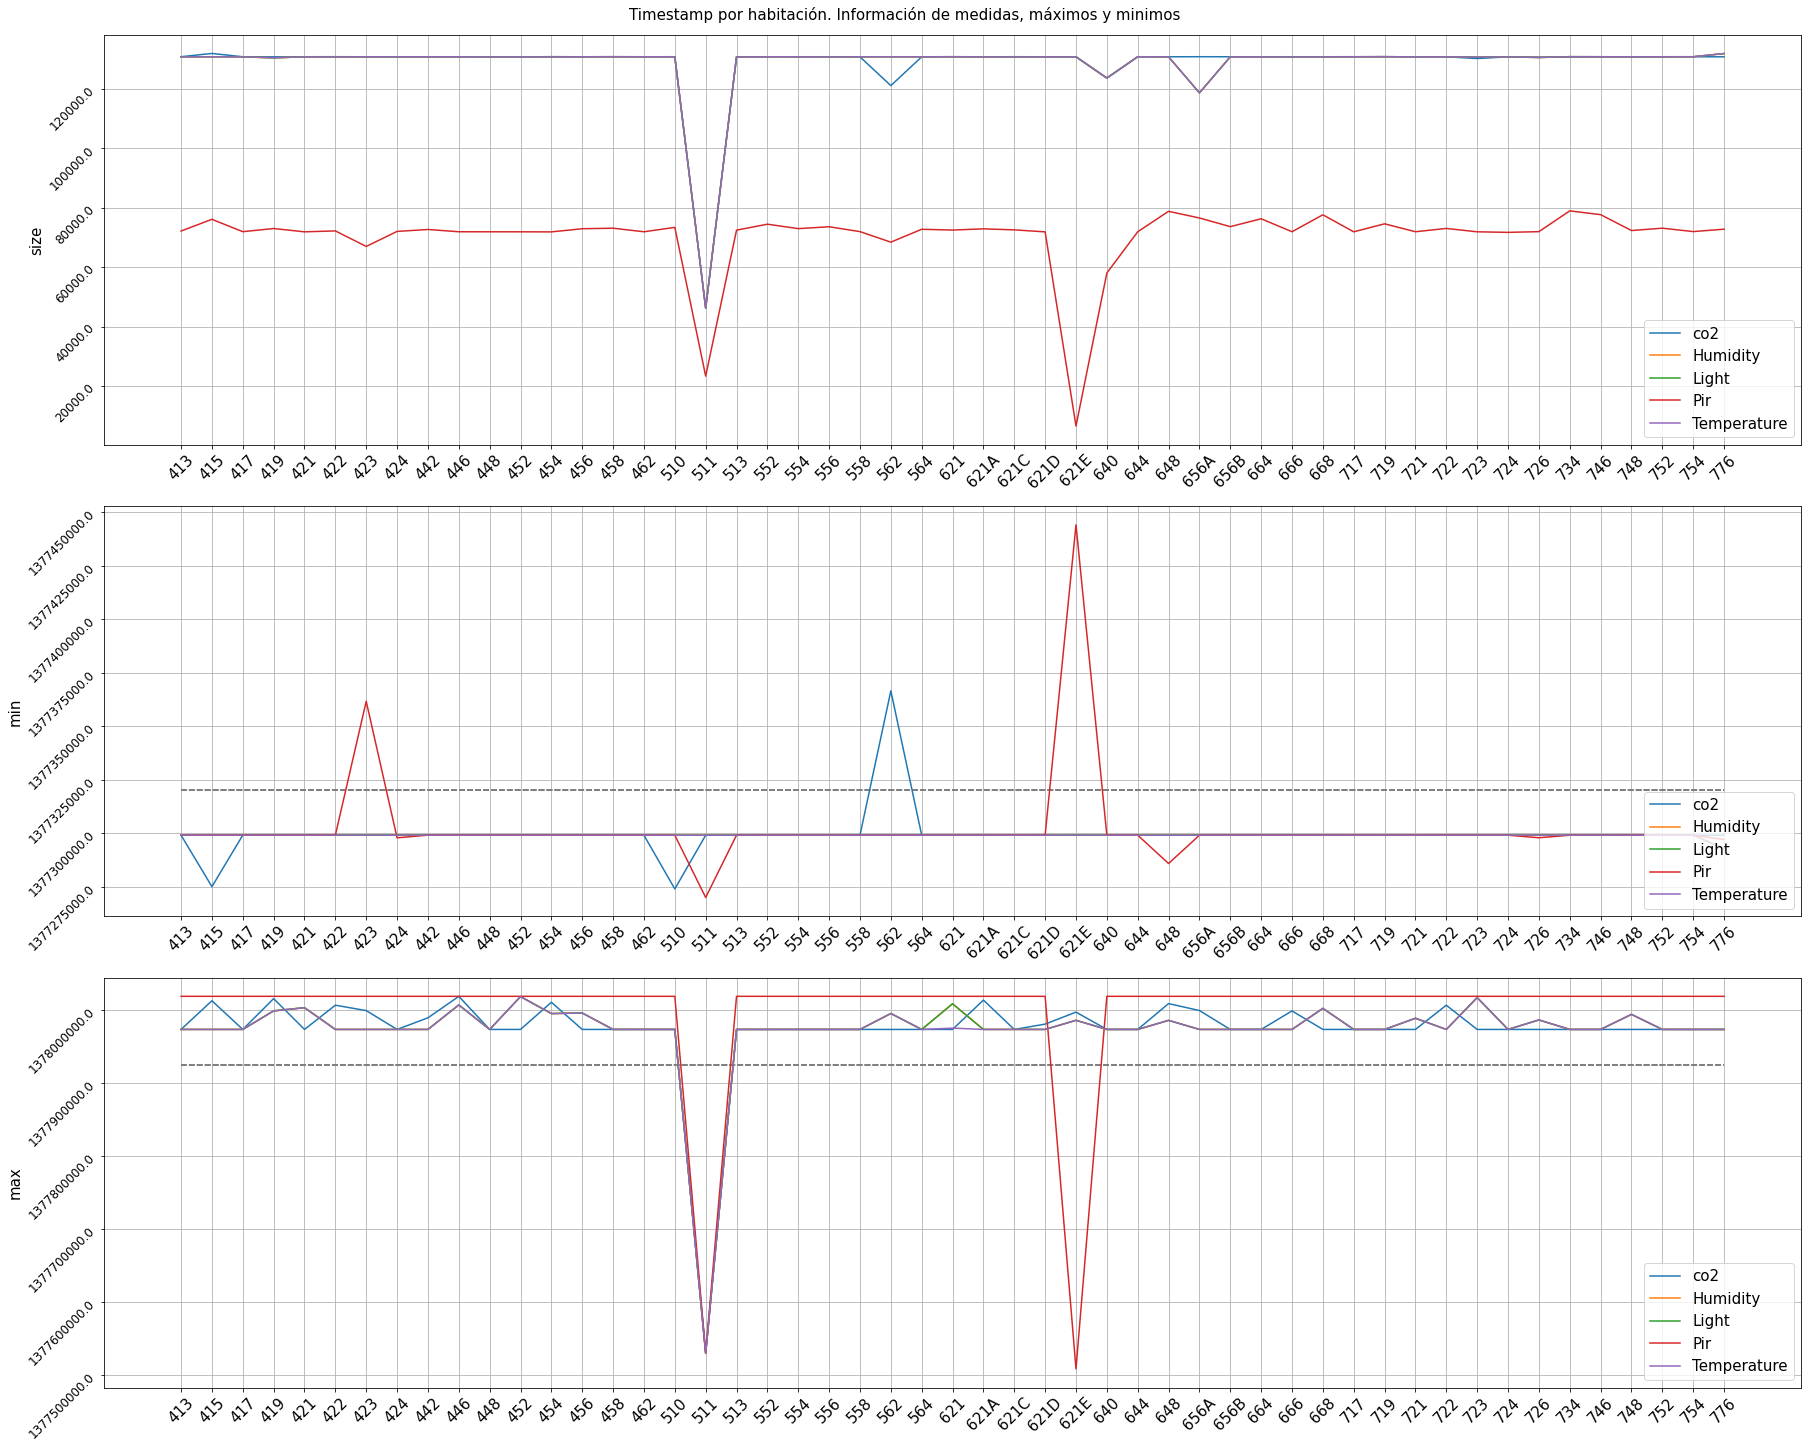

In [ ]:
# http://research.iac.es/sieinvens/python-course/matplotlib.html
# https://aprendepython.es/pypi/datascience/matplotlib/


fig, ax = plt.subplots(3,1, figsize=(25,20), constrained_layout=True)

for cat in cats:
  for f in range(0,3):
    ax[f].plot(df_sizes[df_sizes['cat']==cat]['room'], df_sizes[df_sizes['cat']==cat][feat[f]], alpha = 1)
    ax[f].grid()
    ax[f].legend(cats, prop = {'size': 15}, loc='lower right')
    #ax[f].set_xlabel('habitación')
    ax[f].set_xticklabels(df_sizes[df_sizes['cat']==cat]['room'], fontsize=15, rotation = 45) 
    ax[f].set_yticklabels(ax[f].get_yticks(), rotation = 45, fontsize=12) 
    ax[f].set_ylabel(feat[f], fontsize=15)

    if f==1:
      ax[f].hlines(y=LIM_MIN,  xmin=0, xmax=50,color='gray', linestyle='--')
    if f==2:
      ax[f].hlines(y=LIM_MAX,  xmin=0, xmax=50, color='gray', linestyle='--')
    
#fig.tight_layout(pad=1)
fig.suptitle('Timestamp por habitación. Información de medidas, máximos y minimos', fontsize=15) 

plt.show()  

## REST OF CATHEGORIES (VARIABLES) STUDY 

## TOTAL BASIC STATISTICS

Now we study the rest of variables in a global way, not by room. 



In [ ]:
# Creating a global dataframe with data from all rooms

df_dataGlobal = None
df_dataGlobal = pd.DataFrame()

for cat in tqdm(range (1,6)):
  #print (cat)
  for room in range (0,len(rooms)):
      predf= pd.DataFrame(KETI[room][cat][1].values)
      predf["room"]=KETI[room][0]
      predf["roomSec"]=dic_RoomSec[KETI[room][0]]
      predf["cat"]=KETI[room][cat][0]
      df_dataGlobal = pd.concat ([df_dataGlobal, predf])
       
       
df_dataGlobal.columns =  ["data","timerange","room","roomSec", "cat"]

df_dataGlobal.head()


100%|██████████| 5/5 [01:33<00:00, 18.76s/it]


,data,timerange,room,roomSec,cat
0,488.0,1377299105.0,413,0,co2
1,495.0,1377299105.0,413,0,co2
2,487.0,1377299110.0,413,0,co2
3,496.0,1377299125.0,413,0,co2
4,495.0,1377299130.0,413,0,co2


In [ ]:
da_co2 =  df_dataGlobal[df_dataGlobal["cat"] == 'co2']
da_hum =  df_dataGlobal[df_dataGlobal["cat"] == 'Humidity']
da_lig = df_dataGlobal[df_dataGlobal["cat"] == 'Light']  
da_pir = df_dataGlobal[df_dataGlobal["cat"] == 'Pir']  
da_tem =  df_dataGlobal[df_dataGlobal["cat"] == 'Temperature']

def frameCons():
  frame=[]
  fi=[da_co2, da_hum, da_lig, da_pir,da_tem]
  for f in fi:
    preFrame = [f['data'].max(),f['data'].min(),f['data'].mean(),f['data'].median(),f['data'].std(),f['data'].sem()]
    frame.append(preFrame)    
  return frame

df_dataMedias =pd.DataFrame(frameCons(), index=["co2", "Humidity", "Light", "Pir","Temperature"], 
                 columns= ['max','min','mean','median','std','sem'])

df_dataMedias

,max,min,mean,median,std,sem
co2,1699.00,8.00,411.0065763534,410.00,103.5154127730,0.0403728961
Humidity,71.91,-500.96,56.7477053351,57.01,4.3079003404,0.0016804846
Light,30551.00,0.00,82.2615565210,5.00,310.1547096558,0.1209894066
Pir,34456.00,0.00,1.7543006266,0.00,19.3454020867,0.0102044961
Temperature,579.27,-40.10,23.9701988966,23.11,21.1916788217,0.0082667146


## DATA DISTRIBUTION

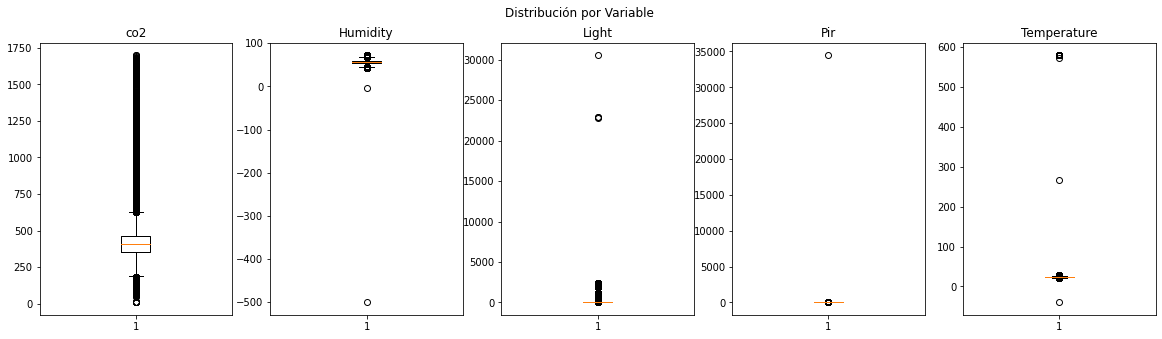

In [ ]:
## BOXPLOT FOR ALL VARIABLES

data = [da_co2['data'] ,da_hum['data'] ,da_lig['data'] ,da_pir['data'] ,da_tem['data']  ]
fig, ax = plt.subplots(1,5, figsize=(20, 5))
i=0
for dd in data:
  
  ax[i].boxplot(dd)
  ax[i].set_title(cats[i])
  i=i+1
  
fig.suptitle('Distribución por Variable') 
plt.show()

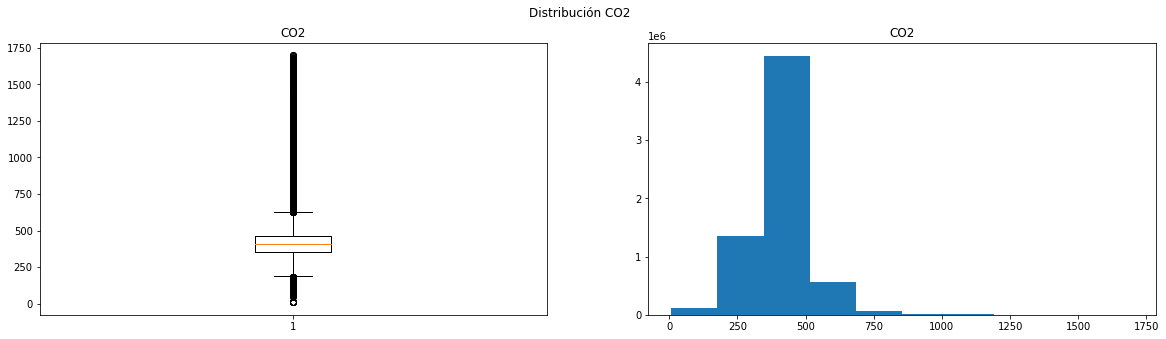

In [ ]:
## CO2
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].boxplot(da_co2.data)
ax[0].set_title('CO2')

ax[1].hist(da_co2.data)
ax[1].set_title('CO2')

fig.suptitle('Distribución CO2') 
plt.show()

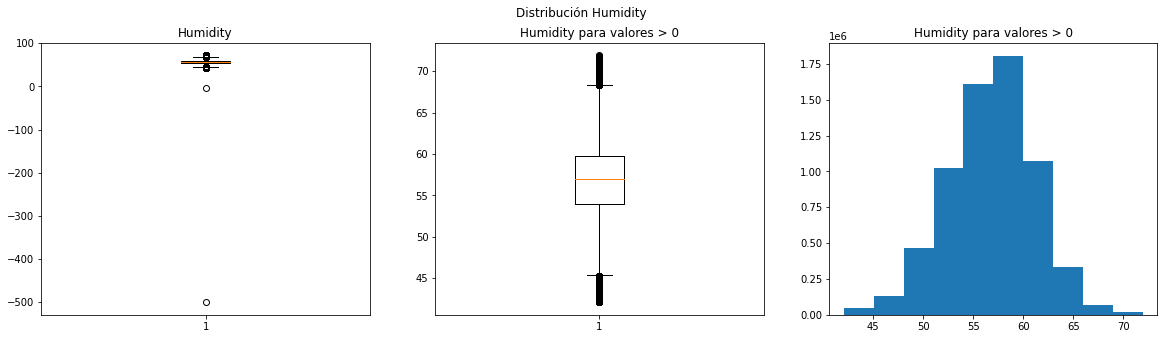

In [ ]:
## HUMIDITY
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].boxplot(da_hum.data)
ax[0].set_title('Humidity')

ax[1].boxplot(da_hum.data[da_hum.data>0])
ax[1].set_title('Humidity para valores > 0')

ax[2].hist(da_hum.data[da_hum.data>0])
ax[2].set_title('Humidity para valores > 0')

fig.suptitle('Distribución Humidity') 
plt.show()

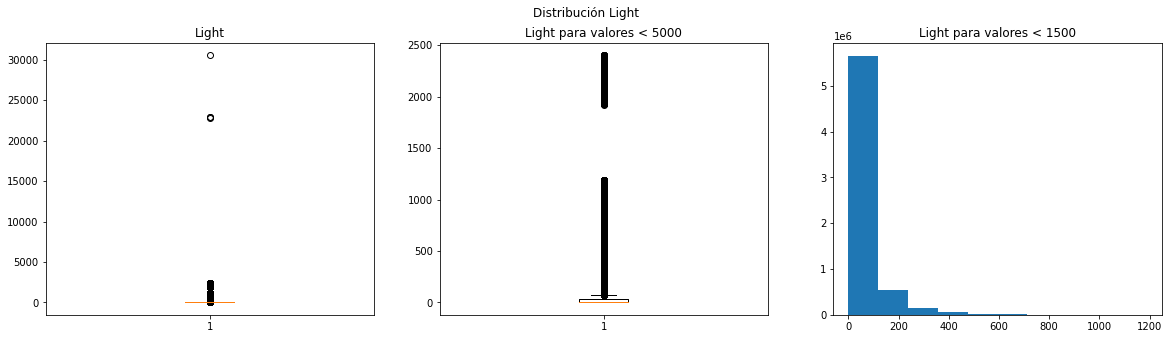

In [ ]:
## LIGHT
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].boxplot(da_lig.data)
ax[0].set_title('Light')

ax[1].boxplot(da_lig.data[da_lig.data<5000])
ax[1].set_title('Light para valores < 5000')

ax[2].hist(da_lig.data[da_lig.data<1500])
ax[2].set_title('Light para valores < 1500')

fig.suptitle('Distribución Light') 
plt.show()

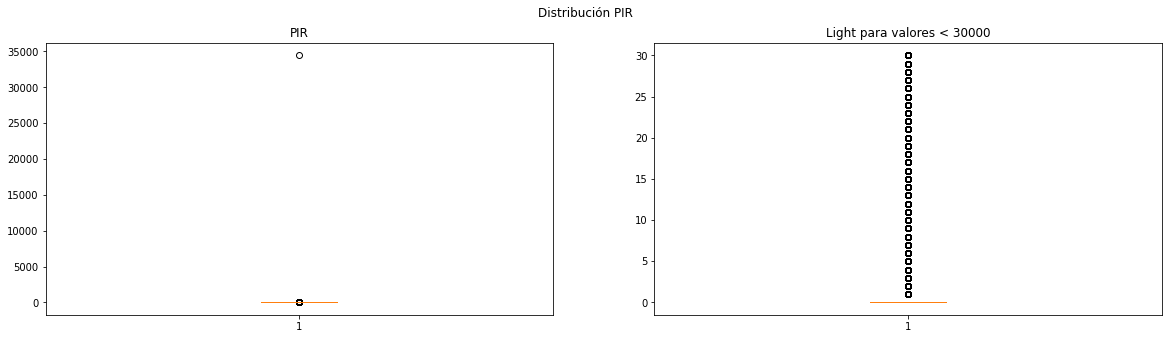

In [ ]:
## PIR
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].boxplot(da_pir.data)
ax[0].set_title('PIR')

ax[1].boxplot(da_pir.data[da_pir.data<30000])
ax[1].set_title('Light para valores < 30000')

fig.suptitle('Distribución PIR') 
plt.show()

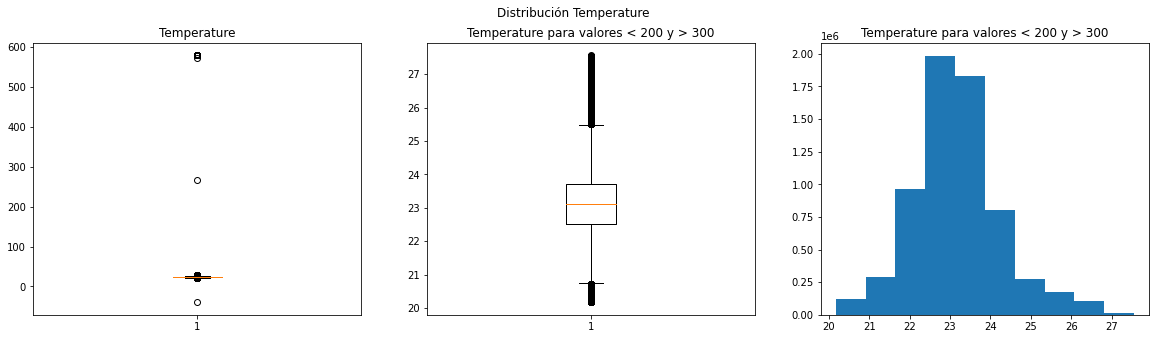

In [ ]:
## TEMPERATURE
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].boxplot(da_tem.data)
ax[0].set_title('Temperature')

ax[1].boxplot(da_tem.data[(da_tem.data > 0) & (da_tem.data <200)])
ax[1].set_title('Temperature para valores < 200 y > 300')

ax[2].hist(da_tem.data[(da_tem.data > 0) & (da_tem.data <200)])
ax[2].set_title('Temperature para valores < 200 y > 300')

fig.suptitle('Distribución Temperature') 
plt.show()

## MAX & MIN BY ROOM.
A "normal" range is defined for all variables in order to identify rooms with anomaly data. Anomaly data is defined as data wich is n times up from max or n times below min. N is calculated for each variable as a multiply of sigma.   

In [ ]:
sigmas = [8,11,15,3,2]   
def is_in_range(maxmin, value, cat_in):
  cat = cats[cat_in-1]
  
  value_back=0
  if (maxmin == 'max'):
    if (value > (df_dataMedias.loc[cat,'mean'] + sigmas[cat_in-1]*df_dataMedias.loc[cat,'std'])):
      value_back = 1
  if (maxmin == 'min'):
    if (value < (df_dataMedias.loc[cat,'mean'] - sigmas[cat_in-1]*df_dataMedias.loc[cat,'std'])):
      value_back = 1
  return value_back

data_list= []
preData_list=[]

for room in range (0,len(rooms)):
  for cat in range (1,6):
      preData_list= [KETI[room][0], dic_RoomSec[KETI[room][0]], KETI[room][cat][0], 
                     KETI[room][cat][1].iloc[:, 0].max(), 
                     KETI[room][cat][1].iloc[:, 0].min(),
                     is_in_range('max', KETI[room][cat][1].iloc[:, 0].max(), cat),
                     is_in_range('min', KETI[room][cat][1].iloc[:, 0].min(), cat)]
      data_list.append(preData_list)
df_dataRoom = pd.DataFrame(data_list, columns=["room", "roomSec", "cat", "max", "min", 'max_in_range', 'min_in_range'])
df_dataRoom.head()


,room,roomSec,cat,max,min,max_in_range,min_in_range
0,413,0,co2,768.00,415.00,0,0
1,413,0,Humidity,54.45,42.38,0,0
2,413,0,Light,333.00,0.00,0,0
3,413,0,Pir,30.00,0.00,0,0
4,413,0,Temperature,25.65,22.63,0,0


In [ ]:
df_dataRoom.to_csv('/content/drive/My Drive/UOC/TFM/GITHUB/dataRooms.csv', sep=',')

In [ ]:
# Rooms with variables out of range in a significative way
# This table is indicating that room 415 has a out max ranage value for PIR or
# room 723 has a min out of range value   

df_dataRoom[['roomSec','room', 'max_in_range','min_in_range','cat']][df_dataRoom.max_in_range + df_dataRoom.min_in_range > 0 ].groupby(['roomSec', 'room', 'cat']).sum()#.transpose()

max_in_range  min_in_range
roomSec room cat                                    
1       415  Pir                     1             0
3       419  Temperature             1             0
9       446  Temperature             1             0
18      513  Temperature             1             0
20      554  co2                     1             0
23      562  Temperature             1             0
29      621E Light                   1             0
33      656A Humidity                0             1
             Temperature             0             1
38      717  Light                   1             0
42      723  Humidity                0             1
             Light                   1             0
             Temperature             1             0
43      724  Light                   1             0
46      746  Temperature             1             0

## PLOTTING DATA ROOMS

In [ ]:
def plotting_data_room(roomSecList):
  randRooms = []
  for r in roomSecList:
    randRooms.append(dic_SecRoom[r])

  print ("Habitaciones sec: ",roomSecList)
  print ("Habitaciones: ",randRooms)

  t=0    
  fig, ax = plt.subplots(nrows=len(randRoomsSec), ncols=5, figsize=(25,4*len(randRoomsSec)))
  for i in range(0,len(randRoomsSec)):
    ii=randRoomsSec[i]
    for t in range (0,5):
      #plt.subplot(i,5,t)
      ax[i,t].plot(KETI[ii][t+1][1].index, KETI[ii][t+1][1].iloc[:, 0])
      ax[i,t].title.set_text(KETI[i][t+1][0])

  plt.show()

Habitaciones seleccionadas:  [4, 20]
Habitaciones seleccionadas:  ['421', '554']


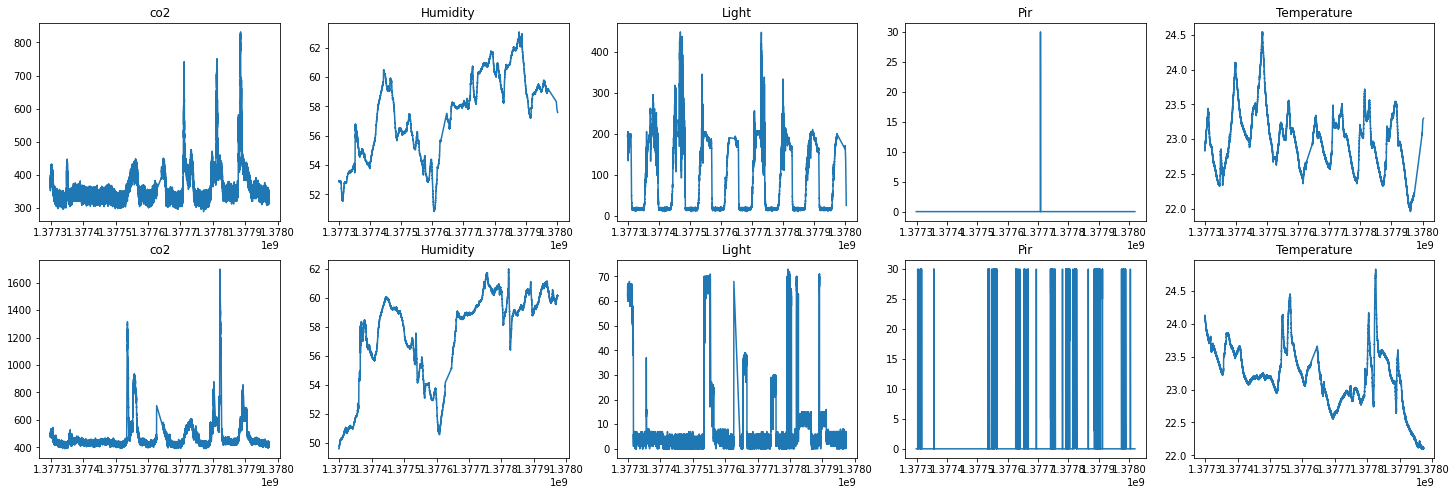

In [ ]:
randRoomsSec = [4,20]  
plotting_data_room(randRoomsSec)

Habitaciones seleccionadas:  [1, 3, 12, 33, 23]
Habitaciones seleccionadas:  ['415', '419', '454', '656A', '562']


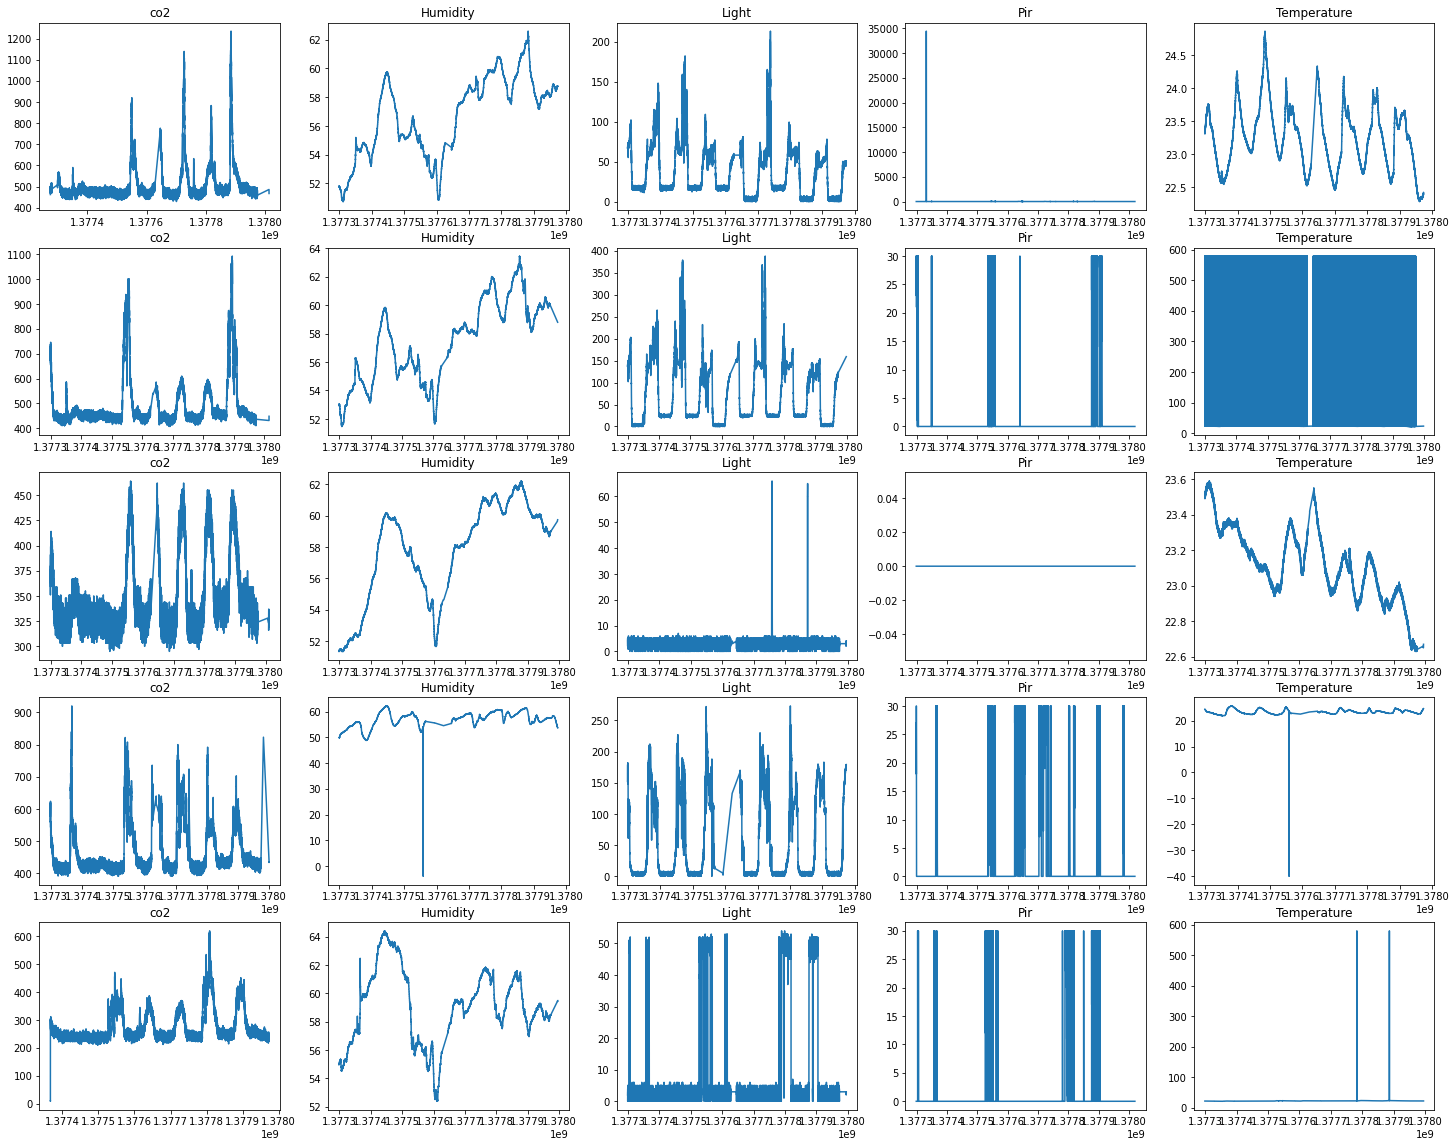

In [ ]:
# NOW PLOTTING ROOMS WITH ANOMALIES
randRoomsSec = [1, 3, 12, 33, 23]
plotting_data_room(randRoomsSec)


## DATA PREPROCESING AND VISUALIZATION

For each room  
1) A df is createdwith total range between limits  
2) Data from variables is loaded into this df. repited steps in range are deleted.  
3) In case NaN exist they are changed by prior value.   
4) Data is scaled with sklearn.maxminscaler in order to generate data between 0 and 1

In [ ]:
scaler = MinMaxScaler()
scaled_KETI = []

for r in tqdm(range(0,51)):
  aa = []
  for c in range (1,6):
    a = KETI[r][c][1][KETI[r][c][1]['timeRange'].isin(totalRange)]
    a = a.drop_duplicates(['timeRange'], keep='last')
    aa.append(a)

  mm = pd.DataFrame(totalRange, columns=['timeRange'])

  for i in range(0, len(aa)):
    mm = mm.merge(aa[i], how = 'outer', on= 'timeRange').sort_values(by=['timeRange'])
    mm.fillna(method= 'ffill', inplace=True)
    mm.fillna(method= 'bfill', inplace=True)
    
  mm[["ScCo2", "ScHum","ScLight", "ScPir", "ScTem"]] = scaler.fit_transform(mm[["co2",	"Humidity",	"Light",	"Pir",	"Temperature"]])
  psK = (r, mm)
  scaled_KETI.append(psK)
  
 


100%|██████████| 51/51 [00:24<00:00,  2.09it/s]


## PLOTTING SCALED VARIABLES 



First HUMIDITY & TEMPERATURE because they present some relation between them

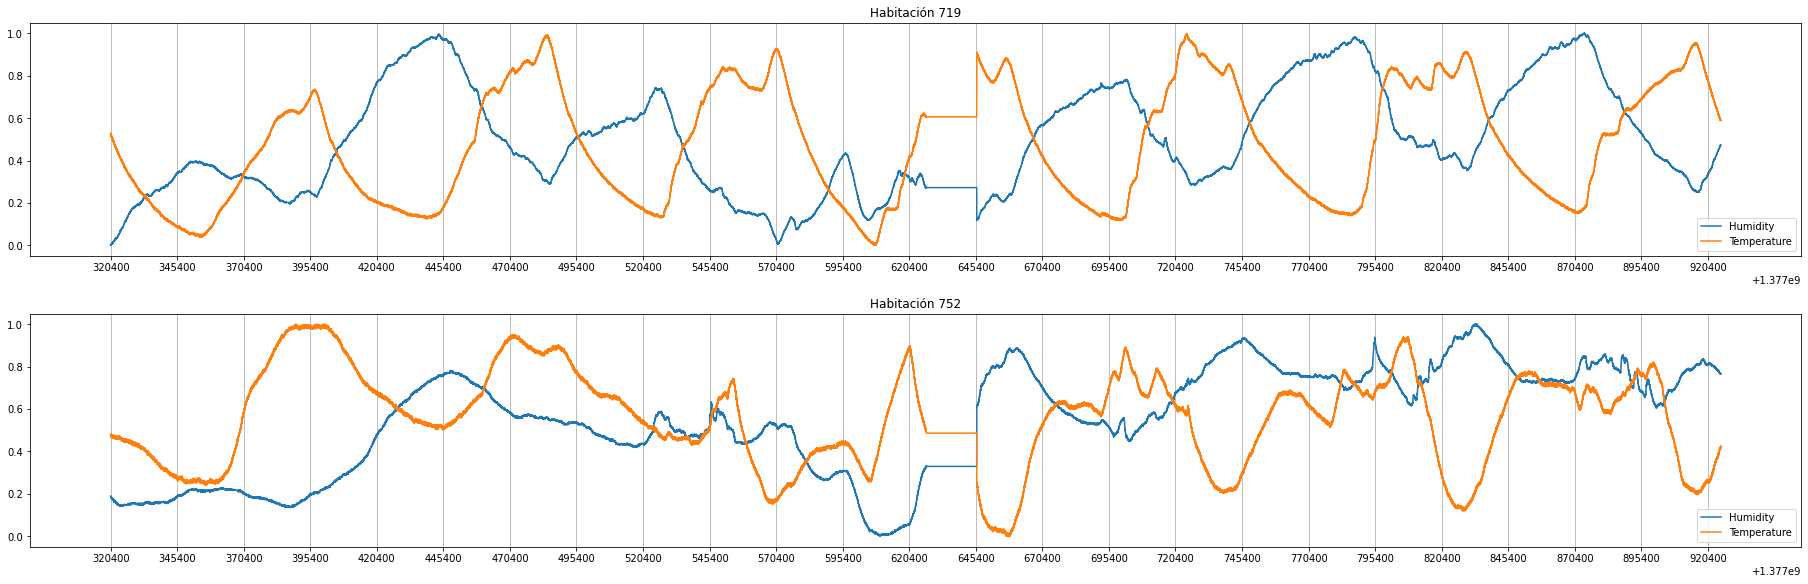

In [ ]:
xs = range(LIM_MIN, LIM_MAX, 25000 )
r=39
fig, ax = plt.subplots(2,1, figsize=(25,8), constrained_layout=True)
ax[0].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScHum'])
ax[0].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScTem'])
ax[0].legend(['Humidity', 'Temperature'], prop = {'size': 10}, loc='lower right')
ax[0].xaxis.grid()
ax[0].set_xticks((xs))
ax[0].set_title('Habitación '+ dic_SecRoom[r] )
r =48
ax[1].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScHum'])
ax[1].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScTem'])
ax[1].legend(['Humidity', 'Temperature'], prop = {'size': 10}, loc='lower right')
ax[1].xaxis.grid()
ax[1].set_xticks(xs)
ax[1].set_title('Habitación ' +dic_SecRoom[r] )

plt.show()


In [ ]:
# NO DATA IN THIS RANGE [1377626759, 1377645750] !!!
print(unix2time_ls([1377626759, 1377645750]))

KETI[20][2][1]['Humidity'].loc[1377626759:1377645749]

['2013-08-27 18:05:59', '2013-08-27 23:22:30']


Series([], Name: Humidity, dtype: float64)

Now PIR, CO2 and Light

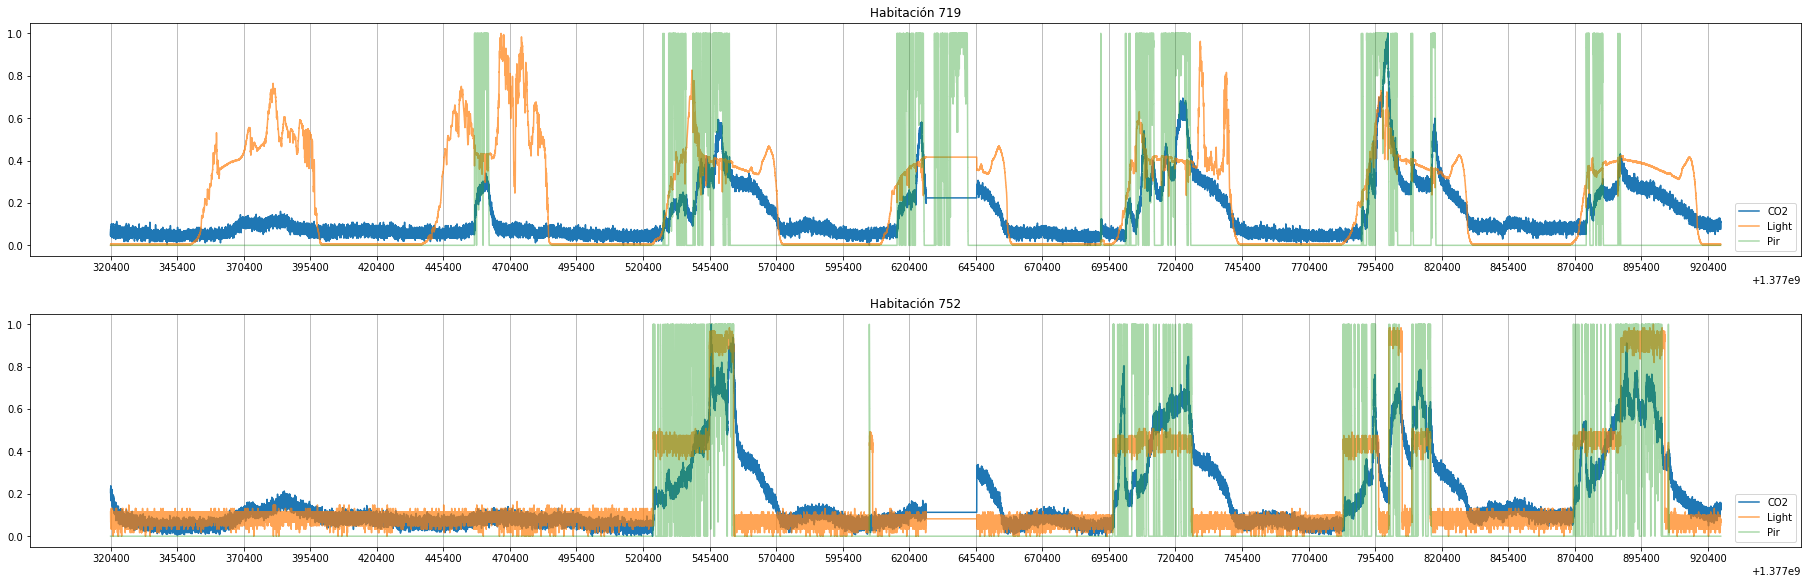

In [ ]:
lim_min_req = LIM_MIN
lim_max_req = LIM_MAX

xs = range(LIM_MIN, LIM_MAX, 25000 )

fig, ax = plt.subplots(2,1, figsize=(25,8), constrained_layout=True)
r=39
ax[0].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScCo2'])
ax[0].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScLight'], alpha =0.7) 
ax[0].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScPir'],   alpha = 0.4)
ax[0].legend(['CO2', 'Light', 'Pir'], prop = {'size': 10}, loc='lower right')
ax[0].xaxis.grid()
ax[0].set_xticks(xs)
ax[0].set_title('Habitación '+ dic_SecRoom[r] )
r=48
ax[1].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScCo2'])
ax[1].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScLight'], alpha =0.7) 
ax[1].plot(scaled_KETI[r][1]['timeRange'], scaled_KETI[r][1]['ScPir'],   alpha = 0.4)
ax[1].legend(['CO2', 'Light', 'Pir'], prop = {'size': 10}, loc='lower right')
ax[1].xaxis.grid()
ax[1].set_xticks(xs)
ax[1].set_title('Habitación '+ dic_SecRoom[r] )

plt.show()



In [ ]:
# save scaled data
import pickle
filename = '/content/drive/My Drive/UOC/TFM/GITHUB/scaled_KETI.pickle'
outfile = open(filename,'wb')
pickle.dump(scaled_KETI,outfile)
outfile.close()